In [25]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt

In [2]:
data = pd.read_json('data.json')

In [49]:
data.columns

Index(['acct_type', 'approx_payout_date', 'body_length', 'channels', 'country',
       'currency', 'delivery_method', 'description', 'email_domain',
       'event_created', 'event_end', 'event_published', 'event_start',
       'fb_published', 'gts', 'has_analytics', 'has_header', 'has_logo',
       'listed', 'name', 'name_length', 'num_order', 'num_payouts',
       'object_id', 'org_desc', 'org_facebook', 'org_name', 'org_twitter',
       'payee_name', 'payout_type', 'previous_payouts', 'sale_duration',
       'sale_duration2', 'show_map', 'ticket_types', 'user_age',
       'user_created', 'user_type', 'venue_address', 'venue_country',
       'venue_latitude', 'venue_longitude', 'venue_name', 'venue_state'],
      dtype='object')

In [67]:
fraud_df['gts'].values.mean()

1911.214361948956

In [66]:
notfraud_df['gts'].values.mean()

2481.6796021159153

nan

In [17]:
fraud=['fraudster_event','fraudster','fraudster_att']
notfraud=['premium','spammer_warn','spammer_limited','spammer_noinvite','locked','tos_lock','tos_warn','spammer_web','spammer']

In [16]:
fraud_df=data[data['acct_type'].isin(fraud)]

In [18]:
notfraud_df=data[data['acct_type'].isin(notfraud)]

In [30]:
fraud_df['body_length'].values.size

1293

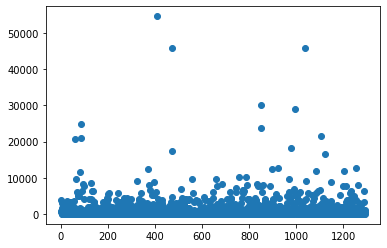

In [38]:
#length of body description for fraudulent events
plt.scatter(list(range(1293)),fraud_df['body_length'].values)

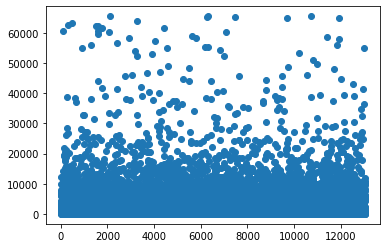

In [39]:
#length of body description for NON - fraudulent events
plt.scatter(list(range(13044)),notfraud_df['body_length'].values)

In [40]:
fraud_df['user_age']

0        36
26       42
51       77
54        0
70        0
         ..
14316     0
14318     0
14325     0
14332     0
14336     0
Name: user_age, Length: 1293, dtype: int64

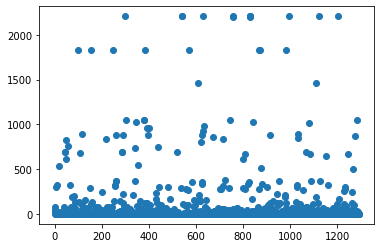

In [41]:
#user age for fraudulent events
plt.scatter(list(range(1293)),fraud_df['user_age'].values)

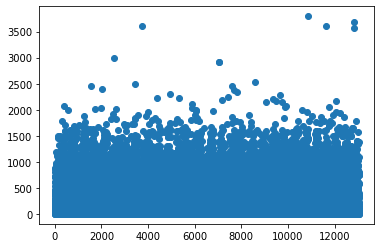

In [88]:
#user age or NON fraudulent events
plt.scatter(list(range(13044)),notfraud_df['user_age'].values)

In [48]:
list(fraud_df['email_domain'].values)

['gmail.com',
 'hotmail.com',
 'cox.net',
 'hotmail.co.uk',
 'yahoo.com',
 'ymail.com',
 'gmail.com',
 'yahoo.com',
 'gmail.com',
 'inbox.com',
 'zumba-perth.com',
 'Safe-mail.net',
 'yopmail.com',
 'aol.com',
 'yahoo.com',
 'diversity-church.com',
 'gmail.com',
 'yahoo.com',
 'comcast.net',
 'gmail.com',
 'yahoo.co.uk',
 'yahoo.ca',
 'gmail.com',
 '19sieunhan.com',
 'mail.com',
 '4asdkids.com',
 'emgay.com',
 'aol.com',
 'mail.com',
 'live.com',
 'ymail.com',
 'gmail.com',
 'gmail.com',
 'outlook.com',
 'gmail.com',
 'yahoo.com',
 'live.com',
 'maroclancers.com',
 'gmail.com',
 'hotmail.fr',
 'gmail.com',
 'gmail.com',
 'live.com',
 'gmail.com',
 'lidf.co.uk',
 'lidf.co.uk',
 'gmail.com',
 'yahoo.com',
 'gcase.org',
 'checker.vn',
 'ymail.com',
 'ymail.com',
 'The2Half.com',
 'gmail.com',
 'yahoo.com',
 'petlover.com',
 'gmail.com',
 'gmail.com',
 'gmail.com',
 'gmail.com',
 'gmail.com',
 'rocketmail.com',
 'gmail.com',
 'gmail.com',
 'gmail.com',
 'ymail.com',
 'yahoo.com',
 'inbox.c

In [59]:
notfraud_df['has_analytics'].values.sum()

1043

In [60]:
fraud_df['has_analytics'].values.sum()

4

In [75]:
# did fraud page have a header?
fraud_df['has_header'].fillna(value=0)
fraud_df['has_header'].values.mean()

0.027842227378190254

In [76]:
# did NON fraud page have a header?
notfraud_df['has_header'].fillna(value=0)
notfraud_df['has_header'].values.mean()

0.13554124501686599

In [80]:
fraud_df['fb_published'].mean()

0.02242846094354215

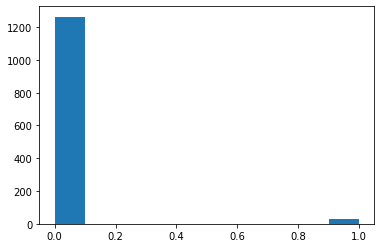

In [90]:
plt.hist(fraud_df['fb_published']);

In [81]:
notfraud_df['fb_published'].mean()

0.13784115302054584

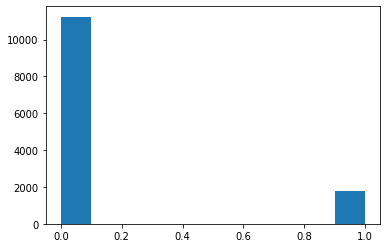

In [91]:
plt.hist(notfraud_df['fb_published']);

In [86]:
fraud_df[len(fraud_df['previous_payouts']) >0][[]]

KeyError: True

In [83]:
notfraud_df['previous_payouts']

1        [{'name': 'RUF', 'created': '2010-10-01 01:10:...
2        [{'name': 'Danielle Severn', 'created': '2010-...
3        [{'name': '', 'created': '2010-11-09 01:10:15'...
4        [{'name': 'Arts and Business Council or Greate...
5        [{'name': 'Bluegrass Stallions', 'created': '2...
                               ...                        
14330    [{'name': 'Center for Spiritual Living- C.O.L....
14331    [{'name': 'Revolution Group', 'created': '2013...
14333    [{'name': 'ARCS Foundation Inc., San Diego Cha...
14334    [{'name': '', 'created': '2013-05-16 03:26:11'...
14335    [{'name': '', 'created': '2010-11-30 01:11:30'...
Name: previous_payouts, Length: 13044, dtype: object

In [93]:
notfraud_df

,acct_type,approx_payout_date,body_length,channels,country,currency,delivery_method,description,email_domain,event_created,...,ticket_types,user_age,user_created,user_type,venue_address,venue_country,venue_latitude,venue_longitude,venue_name,venue_state
1,premium,1296720000,3499,0,US,USD,1.0,"<p>Join us for a quick, one-night, community-b...",ruf.org,1293832670,...,"[{'event_id': 786878, 'cost': 35.0, 'availabil...",149,1280942776,3,,US,32.776566,-79.930922,"The Charleston, SC area",SC
2,premium,1296172800,2601,8,US,USD,1.0,"<h3><span class=""subcategory""><strong>Teacher ...",pvsd.k12.ca.us,1291090956,...,"[{'event_id': 787337, 'cost': 93.51, 'availabi...",214,1272559388,3,10100 Pioneer Blvd Suite 100,US,33.944201,-118.080419,Los Angeles County Office of Education,CA
3,premium,1388966400,12347,6,IE,EUR,1.0,"<p style=""margin-bottom: 1.3em; padding-bottom...",irishtabletennis.com,1360681570,...,"[{'event_id': 885645, 'cost': 25.0, 'availabil...",889,1283870102,3,,None,NaN,NaN,None,None
4,premium,1297900800,2417,11,US,USD,0.0,<p>Writers and filmmakers need to understand t...,artsandbusinesscouncil.org,1291994666,...,"[{'event_id': 1114349, 'cost': 150.0, 'availab...",35,1288984065,3,One Marina Park Drive,US,42.353848,-71.044276,Fish & Richardson,MA
5,premium,1300496400,117,6,US,USD,0.0,<p>Come join the Bluegrass Stallions as they t...,bluegrassstallions.com,1294421810,...,"[{'event_id': 1179983, 'cost': 8.0, 'availabil...",299,1268579110,1,,US,38.209797,-84.558831,Georgetown College Alumni Gymnasium,KY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14330,premium,1363323600,240,11,US,USD,0.0,"<p><img alt=""An Evening of Sheer Elegance, Fa...",gmail.com,1359824184,...,"[{'event_id': 5400186, 'cost': 8.46, 'availabi...",599,1308080253,1,5420 Kimmerly Glen Ln,US,35.226659,-80.730397,Center for Spiritual Living- C.O.L.O.R.S.,NC
14331,premium,1370736000,4560,5,US,USD,1.0,"<p class=""MsoNormal"" style=""margin: 0in 0in 0....",revolutiongroup.com,1364417805,...,"[{'event_id': 5452146, 'cost': 470.2, 'availab...",111,1354810526,3,400 North High Street,US,39.953948,-82.998998,Greater Columbus Convention Center,OH
14333,premium,1365566400,5812,5,US,USD,1.0,"<table style=""width: 600px;"" border=""0"" cellsp...",me.com,1360367042,...,"[{'event_id': 5465112, 'cost': 90.0, 'availabi...",1374,1241625346,4,1775 E Mission Bay Dr,US,32.778906,-117.209791,Hilton San Diego Resort and Spa (Hilton Missio...,CA
14334,premium,1368781200,557,13,,USD,0.0,<p>What a way to start off your Mother's Day l...,yahoo.com,1360600330,...,"[{'event_id': 5465732, 'cost': 20.0, 'availabi...",84,1353386971,4,5991 Bullard Road,US,30.041819,-89.957130,Fleur De Lis Ballroom NUMBER 2,LA
